In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
from tqdm.notebook import trange

model_input_size = (224, 224)
model_path = 'weights/mobilenet-finetune/'

In [2]:
tf.__version__

'2.4.0-dev20201002'

In [3]:
model = tf.keras.models.load_model(model_path)

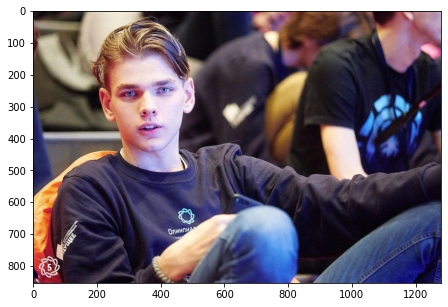

In [4]:
img = cv2.imread('data/img2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10, 5))
plt.imshow(img)

In [5]:
patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                   for x in range(0, img.shape[0], model_input_size[0])
                   for y in range(0, img.shape[1], model_input_size[1])]
patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]

In [6]:
np.shape(patches)

(24, 224, 224, 3)

In [7]:
predictions = model(np.array(patches)) > 0

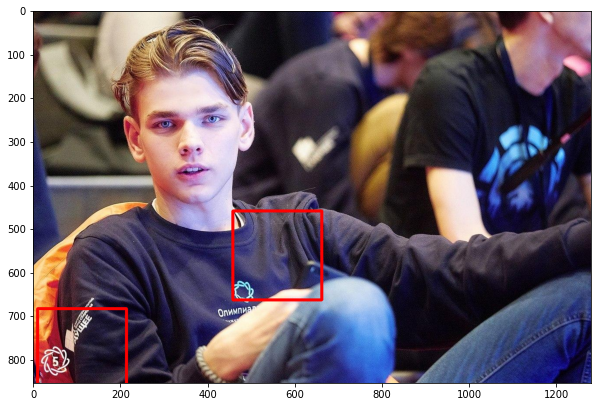

In [8]:
img_to_draw = img.copy()
for i, coords in enumerate(patches_coords):
    if predictions[i]:
        eps = 10
        img_to_draw = cv2.rectangle(img_to_draw, 
                                    (coords[2] + eps, coords[0] + eps), 
                                    (coords[3] - eps, coords[1] - eps), 
                                    (255, 0, 0), 5)
#         blended = cv2.rectangle(blended, (y, x), (y + augmented_img.shape[1], x + augmented_img.shape[0]), (255, 0, 0), 1)

plt.figure(figsize=(10, 10))

plt.imshow(img_to_draw)

IndexError: list index out of range

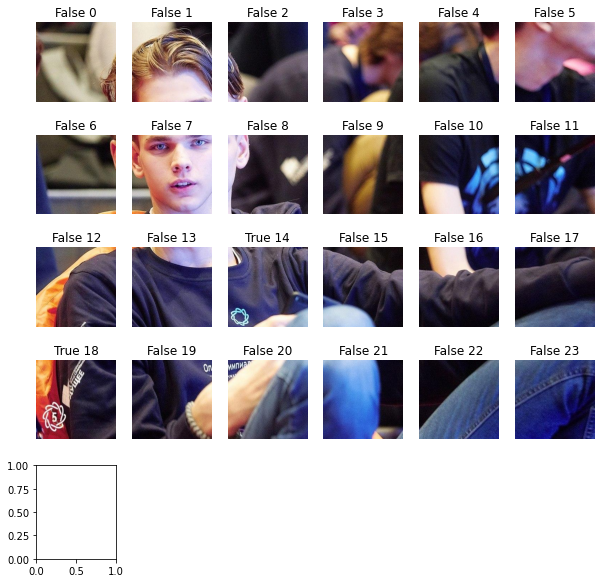

In [9]:
plt.figure(figsize=(10, 10))
for i in range(30):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(patches[i].astype('uint8'))
    prediction = model(np.array([patches[i]]))[0][0] > 0
    plt.title(f'{prediction} {i}')
    plt.axis("off")

tf.Tensor([[-6.634144]], shape=(1, 1), dtype=float32)


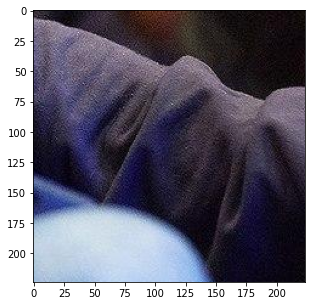

In [10]:
n = 15
print(model(np.array([patches[n]])))
plt.figure(figsize=(5, 5))
plt.imshow(patches[n])

(960, 1280, 3)
True False
(853, 1280, 3)
True False
(1200, 1800, 3)
True False
(1706, 2560, 3)
True False
(392, 590, 3)
True False



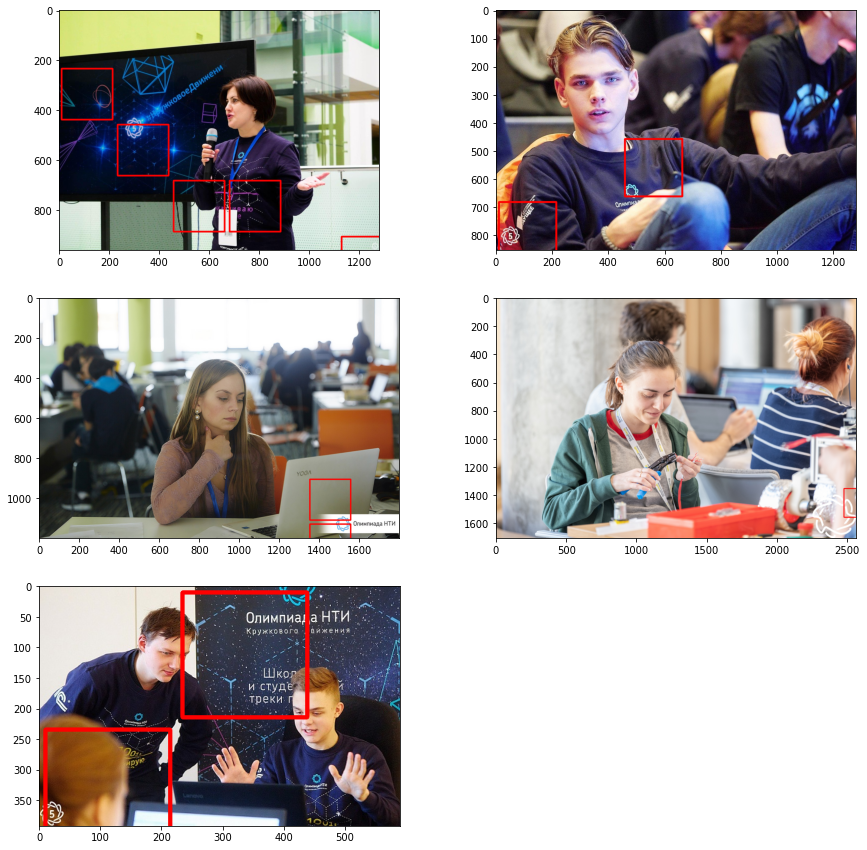

In [31]:
plt.figure(figsize=(15, 15))
for j in trange(1, 6):
    img = cv2.imread(f'data/img{j}.jpg')
#     img = cv2.resize(img, (1000, 1000))
    print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                       for x in range(0, img.shape[0], model_input_size[0])
                       for y in range(0, img.shape[1], model_input_size[1])]
    patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]
    predictions = model(np.array(patches)) > 0
    result_patches = predictions.numpy().any()
    result_whole = model(cv2.resize(img, model_input_size)[np.newaxis])[0][0].numpy() > 0
    
    result = result_patches or result_whole
    print(result_patches, result_whole)
    
    img_to_draw = img.copy()
    for i, coords in enumerate(patches_coords):
        if predictions[i]:
            eps = 10
            img_to_draw = cv2.rectangle(img_to_draw, 
                                        (coords[2] + eps, coords[0] + eps), 
                                        (coords[3] - eps, coords[1] - eps), 
                                        (255, 0, 0), 5)

    plt.subplot(3, 2, j)
    plt.imshow(img_to_draw)
# plt.savefig('detection-examples.jpg')

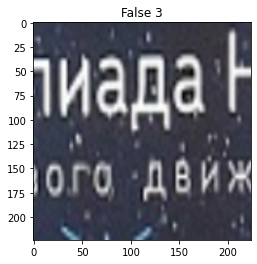

In [23]:
n = 3
img = patches[n].copy()
img = cv2.resize(img, (400, 400))[-224:, :224]
prediction = model(np.array([img]))[0][0] > 0
plt.title(f'{prediction} {n}')
plt.imshow(img)

In [44]:
img = cv2.imread(f'data/img5.jpg')

# img = cv2.resize(img, (10, 10))


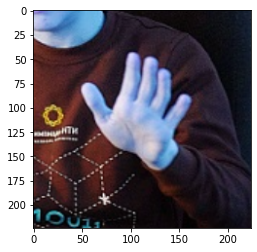

In [45]:
padding = 150
angles = [img[:padding, :padding], img[-padding:, :padding], 
          img[:padding, -padding:], img[-padding:, -padding:]]
plt.imshow(cv2.resize(angles[3], model_input_size))

[[False]
 [False]
 [False]
 [False]]
False False True


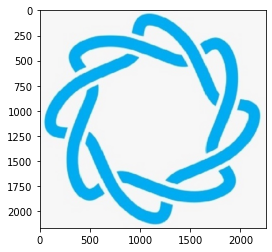

In [54]:
img = cv2.imread(r"data/img7.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

padding = 150
angles = [img[:padding, :padding], img[-padding:, :padding], 
          img[:padding, -padding:], img[-padding:, -padding:]]
angles = [cv2.resize(angle, model_input_size) for angle in angles]

patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                   for x in range(0, img.shape[0], model_input_size[0])
                   for y in range(0, img.shape[1], model_input_size[1])]
patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]


# Check sing on every segment
result_patches = (model(np.array(patches)).numpy() > 0).any()

# Check sign in angles up-close
result_angles = (model(np.array(angles)).numpy() > 0).any()
print(model(np.array(angles)).numpy() > 0)
# Check giant sign on whole image
result_whole = model(cv2.resize(img, model_input_size)[np.newaxis])[0][0].numpy() > 0

result = result_patches or result_angles or result_whole

print(result_patches, result_angles, result_whole)
plt.imshow(img)